In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from colicoords import RDistModel, PSF
from colicoords import CellListPlot, save, load, SynthCellList, CellPlot, Cell, Data
from colicoords.iplot import iter_subplots, IterCellPlot
from tqdm import tqdm_notebook
import numpy as np

C:\Miniconda3\envs\py_main\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [4]:
lengths = np.random.normal(40, 5, 100)
radii = np.random.normal(8, 0.4, 100)
curvatures = np.random.normal(0, 0.0075, 100)

cell_list = SynthCellList(lengths, radii, curvatures)

# for cell in tqdm_notebook(cell_list):
#     num = 1#int(np.random.random_integers(4, 8))
#     cell.add_storm_membrane(num, 0.9*cell.coords.r, r_std=0.1*cell.coords.r, name='storm_1')
    
# for cell in tqdm_notebook(cell_list):
#     num = 1#int(np.random.random_integers(4, 8))
#     cell.add_storm_membrane(num, 0.9*cell.coords.r, r_std=0.1*cell.coords.r, name='storm_2')    

In [6]:
type(cell_list)(lengths, radii, curvatures)

In [8]:
def add_flu_storm(cell_list, storm_name, flu_name):
    sigma_value = 1.54
    for cell in cell_list:
        xmax = cell.data.shape[1]
        ymax = cell.data.shape[0]
        step = 1
        xi = np.arange(step / 2, xmax, step)
        yi = np.arange(step / 2, ymax, step)

        x_coords = np.repeat(xi, len(yi)).reshape(len(xi), len(yi)).T
        y_coords = np.repeat(yi, len(xi)).reshape(len(yi), len(xi))
        x, y = cell.data.data_dict[storm_name]['x'], cell.data.data_dict[storm_name]['y']

        img = np.zeros_like(x_coords)
        intensities = np.ones_like(x)
        sigma = np.ones_like(x)*sigma_value
        for _sigma, _int, _x, _y in zip(sigma, intensities, x, y):
            img += _int * np.exp(-(((_x - x_coords) / _sigma) ** 2 + ((_y - y_coords) / _sigma) ** 2) / 2)

        cell.data.add_data(img, 'fluorescence', flu_name)

In [9]:
add_flu_storm(cell_list, 'storm_1', 'flu_1')
add_flu_storm(cell_list, 'storm_2', 'flu_2')

<IPython.core.display.Javascript object>


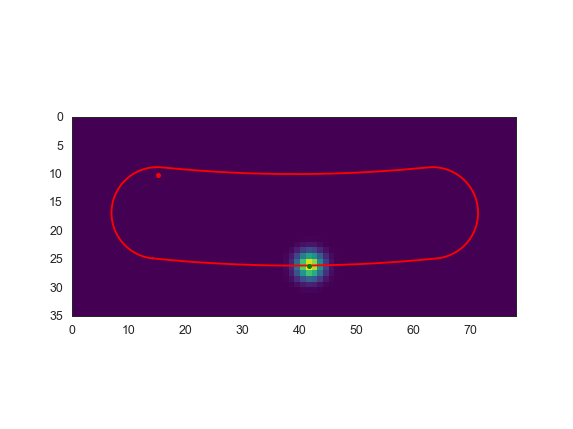

In [13]:
fig, axes = iter_subplots()
cp = IterCellPlot(cell_list)
cp.imshow('flu_2')
cp.plot_outline()
cp.plot_storm(data_name='storm_1', method='plot', color='r')
cp.plot_storm(data_name='storm_2', method='plot', color='g')
fig.display()

In [ ]:
save('test_single_spot_storm.hdf5', cell_list[:10])

In [14]:
save('test_double_spot_storm.hdf5', cell_list[:20])

In [23]:
cell = cell_list[0]
flu = cell.data.data_dict['fluorescence']
storm = cell.data.data_dict['storm']
x, y = storm['x'], storm['y']
fl = flu.copy()
fl[fl < 0.1] = 0


x_fl = np.sum(cell.coords.x_coords*flu) / np.sum(flu)
y_fl = np.sum(cell.coords.y_coords*flu) / np.sum(flu)


KeyError: 'fluorescence'

In [73]:
x, y

(STORMTable([59.01039578]), STORMTable([11.57007865]))

In [75]:
x_fl, y_fl

(FluorescenceImage(59.01038103), FluorescenceImage(11.57007865))

In [25]:
cells_no_flu = []
for c in cell_list:
    d = Data()
    d.add_data(c.data.binary_img, 'binary')
    d.add_data(c.data.data_dict['storm_1'], 'storm', 'storm_1')
    d.add_data(c.data.data_dict['storm_2'], 'storm', 'storm_2')
    cell = Cell(d)
    cells_no_flu.append(cell)

In [31]:
[i for i in range(0, 720, 20)]

[0,
 20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500,
 520,
 540,
 560,
 580,
 600,
 620,
 640,
 660,
 680,
 700]

In [32]:
data_r = cells_no_flu[0].data.copy()


storm = data_r.data_dict['storm_1']
x1, y1 = storm['x'], storm['y']

storm = data_r.data_dict['storm_2']
x2, y2 = storm['x'], storm['y']

d = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
print(d[0])

data = data_r.copy()
for th in range(0, 740, 20):
    data_r = data.rotate(th)

    storm = data_r.data_dict['storm_1']
    x1, y1 = storm['x'], storm['y']

    storm = data_r.data_dict['storm_2']
    x2, y2 = storm['x'], storm['y']

    d = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    print(d[0])




30.993015481513616
30.993015481513616
30.99301548151362
30.993015481513616
30.99301548151362
30.99301548151362
30.993015481513613
30.993015481513613
30.99301548151362
30.99301548151361
30.99301548151362
30.993015481513613
30.993015481513616
30.993015481513616
30.99301548151362
30.993015481513616
30.99301548151362
30.993015481513616
30.993015481513613
30.993015481513616
30.993015481513623
30.993015481513616
30.99301548151362
30.99301548151362
30.993015481513616
30.99301548151362
30.99301548151362
30.993015481513616
30.993015481513616
30.993015481513616
30.99301548151362
30.993015481513616
30.993015481513616
30.993015481513623
30.993015481513616
30.99301548151362
30.993015481513616
30.99301548151362


In [35]:
data_r = cells_no_flu[0].data.copy()


storm = data_r.data_dict['storm_1']
x1, y1 = storm['x'][0], storm['y'][0]

storm = data_r.data_dict['storm_2']
x2, y2 = storm['x'][0], storm['y'][0]

# d = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
# print(d[0])

# data = data_r.copy()
# for th in range(0, 740, 20):
#     data_r = data.rotate(th)

#     storm = data_r.data_dict['storm_1']
#     x1, y1 = storm['x'], storm['y']

#     storm = data_r.data_dict['storm_2']
#     x2, y2 = storm['x'], storm['y']

#     d = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
#     print(d[0])

In [43]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

In [42]:
def angle_between(data):
    xmid = data.shape[1] / 2
    ymid = data.shape[0] / 2
    
    storm = data_r.data_dict['storm_1']
    v1 = storm['x'][0] - xmid, storm['y'][0] - ymid

    storm = data_r.data_dict['storm_2']
    v2 = storm['x'][0] - xmid, storm['y'][0] - ymid
    
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [44]:
data = cells_no_flu[0].data.copy()

In [45]:
angle_between(data)

1.8414722925840212

In [46]:
angle_between(data.rotate(20))

2.1562672375213197

In [36]:
np.arctan2(y1-y2 , x1-x2)

-2.6022156547936697

In [39]:
20%360

20

In [37]:
data = data_r.copy()


data_r = data.rotate(20)

storm = data_r.data_dict['storm_1']
x1, y1 = storm['x'], storm['y']

storm = data_r.data_dict['storm_2']
x2, y2 = storm['x'], storm['y']

np.arctan2(y1-y2 , x1-x2)


STORMTable([-2.2531498])

In [38]:
(-2.6022156547936697 + 2.2531498)*(180/np.pi)

-20.0000002518037

In [15]:
data_r = cell_list[0].data.copy()

data_r = data_r.rotate(90)
flu = data_r.data_dict['fluorescence']
storm = data_r.data_dict['storm']
x, y = storm['x'], storm['y']

nc = Cell(data_r, init_coords=True)
x_fl = np.sum(nc.coords.x_coords * flu) / np.sum(flu)
y_fl = np.sum(nc.coords.y_coords * flu) / np.sum(flu)

print(x[0], x_fl, n_equal(x[0], x_fl))
print(y[0], y_fl, n_equal(y[0], y_fl))


KeyError: 'fluorescence'

In [120]:
def n_equal(d1, d2):
    i = 0
    while i < 50:
        if d1 // 1 != d2 // 1:
            break
        i += 1
        d1 = d1 * 10 % 10
        d2 = d2 * 10 % 10
        
    return i - 1

In [121]:
n_equal(2.000002, 2.000002)

49

In [108]:
6.989604218533273 * 10 % 10 // 1

9.0

In [103]:
6.989604218533273 // 1

6.0

In [148]:
print(x, x_fl)
print(y, y_fl)

[6.93946926] 6.936427093590804
[19.84954649] 19.672086522412613


In [140]:
from symfit import Fit, Parameter, Variable, exp

In [144]:
def make_model(x_mu_val, y_mu_val):

    sig_x = 1.54
    sig_y = 1.54
    x_mu = Parameter(name='x_mu', value=x_mu_val)
    y_mu = Parameter(name='y_mu', value=y_mu_val)
    b = Parameter(name='b', value=200)
    x_var = Variable(name='x_var')
    y_var = Variable(name='y_var')
    z_var = Variable(name='z_var')

    model = {z_var: exp(-( ((x_var-x_mu)**2/(2*sig_x**2)) + ((y_var-y_mu)**2 / (2*sig_y**2)) )) + b}
    return model

In [145]:
xx, yy = nc.coords.x_coords, nc.coords.y_coords

model = make_model(x, y)
fit = Fit(model, x_var=xx, y_var=yy, z_var=flu)
res = fit.execute()

In [147]:
print(res)


Parameter Value        Standard Deviation
b         2.728664e-07 2.052898e-06
x_mu      6.936160e+00 7.696742e-05
y_mu      1.967199e+01 7.696743e-05
Fitting status message: Optimization terminated successfully.
Number of iterations:   12
Regression Coefficient: 0.9999972062060312



<IPython.core.display.Javascript object>


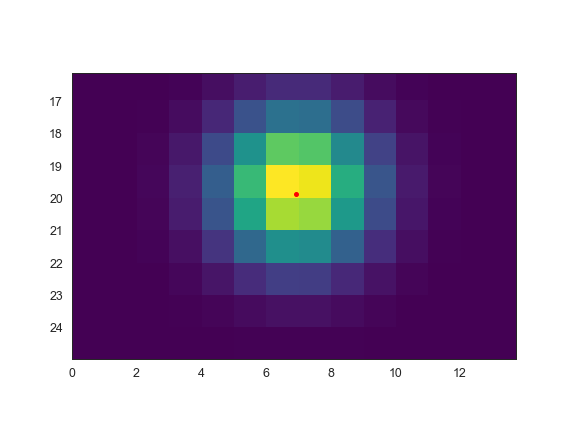

In [138]:
plt.figure()
cp = CellPlot(nc)
cp.imshow('fluorescence')
cp.plot_storm()

<IPython.core.display.Javascript object>


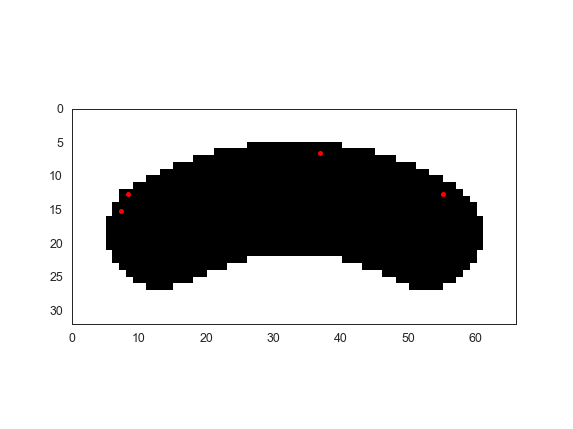

In [51]:
plt.figure()
cp = CellPlot(cell_list[3])
cp.imshow('fluorescence')
cp.imshow('binary')
cp.plot_storm(method='plot')

In [75]:
save('fake_data_new.hdf5', cell_list)